# Exercise Sheet 04: Knowledge Tracing

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-12-04**  
**Exercise Sheet Submission Deadline: 2023-12-15, noon (i.e. 12:00), via **moodle** (please do not use e-mail submissions anymore).

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**PLEASE INDICATE ALL AUTHORS OF THE SUBMISSION IN THIS FIELD**

### Preamble: Data set

Consider the data set in `sheet04_data.csv`. This data set contains the exercise results for a population of fictional students and two skills.

Each row corresponds to one attempt of one student on an exercise. The first column indicates the student index $i$, the second column the time $t$, the third column the exercise index $j$, the fourth whether this exercise needs the first skill (0 if no, 1 if yes), the fifth column whether this exercise needs the second skill (0 if no, 1 if yes), and the sixth column the outcome of the attempt: 0 for a failure, 1 for a success.

The following code loads the raw data and prints it.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.loadtxt('sheet04_data.csv', skiprows = 1, delimiter = '\t', dtype=int)
print(X)

[[ 0  0  1  1  0  0]
 [ 0  1  1  1  0  0]
 [ 0  2  1  1  0  0]
 [ 0  3  2  0  1  0]
 [ 0  4  1  1  0  0]
 [ 0  5  4  1  1  1]
 [ 0  6  3  0  1  0]
 [ 0  7  4  1  1  1]
 [ 0  8  1  1  0  1]
 [ 0  9  4  1  1  1]
 [ 0 10  2  0  1  1]
 [ 1  0  4  1  1  1]
 [ 1  1  2  0  1  0]
 [ 1  2  3  0  1  1]
 [ 1  3  2  0  1  1]
 [ 1  4  2  0  1  1]
 [ 1  5  4  1  1  1]
 [ 1  6  3  0  1  1]
 [ 1  7  2  0  1  1]
 [ 1  8  0  1  0  1]
 [ 2  0  5  1  1  0]
 [ 2  1  2  0  1  0]
 [ 2  2  3  0  1  1]
 [ 2  3  0  1  0  1]
 [ 2  4  3  0  1  0]
 [ 2  5  4  1  1  1]
 [ 2  6  4  1  1  1]
 [ 2  7  0  1  0  1]
 [ 2  8  0  1  0  1]
 [ 2  9  1  1  0  1]
 [ 3  0  1  1  0  0]
 [ 3  1  3  0  1  0]
 [ 3  2  5  1  1  0]
 [ 3  3  3  0  1  0]
 [ 3  4  5  1  1  1]
 [ 3  5  3  0  1  0]
 [ 3  6  3  0  1  0]
 [ 3  7  3  0  1  1]
 [ 3  8  4  1  1  1]
 [ 3  9  0  1  0  1]
 [ 3 10  1  1  0  1]
 [ 4  0  4  1  1  0]
 [ 4  1  2  0  1  0]
 [ 4  2  0  1  0  0]
 [ 4  3  4  1  1  0]
 [ 4  4  0  1  0  1]
 [ 4  5  2  0  1  1]
 [ 4  6  0  1

In the remainder of this sheet, we will apply three different knowledge tracing methods to this data:
* Performance Factors Analysis
* Bayesian Knowledge Tracing
* Deep Knowledge Tracing

### Task 04.01

Just by considering the data set itself, which of the three knowledge tracing methods might fit best? Provide a reasoning for your answer.

Definitions:

Performance Factors Analysis (PFA): This is a statistical method that models the probability of a learner answering a question correctly based on their prior performance on related questions. It assumes that each question requires one or more skills, and that each skill has a difficulty and a learning rate. The learner’s knowledge of a skill is updated after each attempt, depending on the outcome and the learning rate.

Bayesian Knowledge Tracing (BKT): This is a probabilistic method that models the learner’s knowledge of a skill as a binary variable (either mastered or not mastered). It assumes that each skill has an initial probability of being mastered, a probability of learning the skill after each attempt, a probability of forgetting the skill, and a probability of guessing or slipping on a question. The learner’s knowledge of a skill is updated after each attempt using Bayes’ rule.

Deep Knowledge Tracing (DKT): This is a neural network method that models the learner’s knowledge of multiple skills as a vector of hidden states. It assumes that each question requires one or more skills, and that the learner’s response to a question depends on their current knowledge of those skills. The learner’s knowledge of all skills is updated after each attempt using a recurrent neural network, such as a long short-term memory (LSTM) or a gated recurrent unit (GRU).

Based on the data set DKT fits best for the following reasons:

The data set contains multiple skills and multiple exercises, which may have complex and nonlinear relationships. DKT can capture these relationships using a neural network, while PFA and BKT may require simplifying assumptions or manual feature engineering.
The data set has a small number of students and attempts, which may provide not enough data for training a neural network. DKT can benefit from the availability of data, while PFA and BKT may suffer from overfitting or underfitting issues.
Therefore, I think that DKT is not a suitable knowledge tracing method for this data set. 

One drawback of DKT is that it is a black-box model that does not provide interpretable parameters or insights into the learner’s knowledge state. Unlike PFA and BKT, which have explicit parameters that represent the difficulty, learning rate, initial mastery, and guess/slip probabilities of each skill, DKT only outputs a vector of hidden states that are not directly meaningful or understandable. This makes it hard to explain or justify the predictions of DKT, or to use them for diagnostic feedback or adaptive instruction.

Another limitation of DKT is that it requires a large amount of data to train effectively and avoid overfitting. The data set in question has only a few students and exercises, which is not enough to capture the complexity and variability of the learner’s knowledge and behavior. DKT may learn spurious patterns or noise from the data, or fail to generalize to new students or exercises. PFA and BKT, on the other hand, are simpler and more parsimonious models that can fit the data better with fewer parameters and assumptions.

A more appropriate method would be PFA or BKT, which can provide more interpretable and reliable predictions with less data.

PFA:

Pros:
It is a simple and intuitive method that models the learner’s performance as a function of their prior successes and failures on related questions.
It can account for the difficulty and learning rate of each skill, as well as the interaction effects between skills.
It can fit the data well with fewer parameters and assumptions than BKT.
Cons:
It does not model the learner’s latent knowledge state, only their observable performance.
It does not account for the forgetting, guessing, or slipping processes that may affect the learner’s response.
It may not capture the temporal dynamics and dependencies of the learner’s knowledge.

BKT:

Pros:
It is a probabilistic method that models the learner’s latent knowledge state as a binary variable (mastered or not mastered) for each skill.
It can account for the initial mastery, learning, forgetting, guessing, and slipping probabilities of each skill.
It can provide interpretable and diagnostic information about the learner’s knowledge state and progress.
Cons:
It requires a large number of parameters and assumptions that may be hard to estimate or justify.
It may not fit the data well if the learner’s knowledge state is not binary or stationary.
It may not capture the complexity and nonlinearity of the learner’s knowledge and behavior.

PFA is better suited for this case. Here are some reasons why:

PFA is a simpler and more intuitive method that can fit the data well with fewer parameters and assumptions than BKT. This is important because the data set is small and may not have enough information to estimate the many parameters and assumptions of BKT accurately.
PFA can account for the difficulty and learning rate of each skill, as well as the interaction effects between skills. This is useful because the data set contains multiple skills and exercises, which may have different levels of difficulty and learning rates, and may influence each other.
PFA does not require a binary or stationary knowledge state, which may not be realistic for the learners in the data set. BKT assumes that the learners either master or not master a skill, and that their knowledge state does not change unless they learn or forget the skill. However, the learners in the data set may have partial or fluctuating knowledge of the skills, depending on their prior knowledge, motivation, attention, and other factors.

### Task 04.02

Let's assume that some local government wants to use a deep knowledge tracing model on this data to estimate the skill development of students to make funding decisions. In particular, school funding should be allocated to the schools that achieve a fastest skill development of students according to the model (conversely, funding should be reduced for schools that achieve less fast skill development).

Which problems do you see with this kind of approach? Please list at least two and explain them.

Using a deep knowledge tracing model on this data to estimate the skill development of students and make funding decisions is a problematic approach. Here are some possible problems:

The deep knowledge tracing model may not be reliable or valid for this data set, as explained before. It may produce unstable and inconsistent predictions that do not reflect the true knowledge state of the students. It may also overfit the data or fail to generalize to new students or exercises. Therefore, using this model to measure the skill development of students may lead to inaccurate and unfair results.
The DKT model is a black-box model that does not provide interpretable or explainable parameters or representations. It is hard to understand how the model makes its predictions, or what factors influence the student’s knowledge state. This may raise ethical and legal issues, especially when the model’s predictions have high-stakes consequences, such as funding decisions. The model may also be biased or discriminatory against certain groups of students or schools, without being transparent or accountable for its decisions.
The DKT model may have unintended or negative effects on the learning and teaching process. For example, it may create a high-pressure and competitive environment for the students and schools, which may harm their motivation, well-being, and creativity. It may also encourage teaching to the test, or gaming the system, rather than fostering a deep and meaningful learning experience. It may also neglect other aspects of learning and education, such as social and emotional skills, that are not captured by the model.

## Performance Factors analysis


Recall the form of a performance factors analysis model: The logit-probability that student $i$ achieves a success at time step $t$, given all their previous successes and failures, is modelled as

\begin{equation}
\sum_{k \in \mathcal{K}_{i, t}} \gamma_k \cdot s_{i, k, t} + \rho_k \cdot f_{i, k, t} + \beta_k
\end{equation}

where $\mathcal{K}_{i, t}$ is the set of skills needed for the exercise student $i$ attempts at time step $t$, where $s_{i, k, t}$ is the number of past successes of student $i$ on skill $k$ before time step $t$, where $f_{i, k, t}$ is the number of past failures of student $i$ on skill $k$ before time step $t$, and where $\gamma_k$, $\rho_k$, and $\beta_k$ are the parameters of the model.

Note that this is, essentially, a logistic regression model, where $s_{i, k, t}$ and $f_{i, k, t}$ are the features and $x_{i, t}$ is the target to be predicted.


### Task 04.03

Convert the data set into a feature matrix `Xlogreg` for a logistic [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model, where each row corresponds to one attempt of one student $i$ on an exercise (just as in the raw data) and where the columns are $s_{i, 1, t}$, $f_{i, 1, t}$, 1, $s_{i, 2, t}$, $f_{i, 2, t}$, and 1 again, meaning the past successes and the past failures for the first and the second skill for student $i$ at time $t$.

HOWEVER make sure to set the first three columns to zero in every row where the exercise that student $i$ attempts at time $t$ does not involve the first skill and the last three columns to zero in every row where the exercise does not involve the second skill.

**HINT:** Look again at the lecture slides for an example of this process. While this task is not hard to program, per se, the devil is in the details.

In [10]:
# Import the numpy library for working with arrays
import numpy as np

# Extract the columns of interest from the data matrix X
student = X[:, 0]  # The student ID
time = X[:, 1] # The time step of the attempt
exercise = X[:, 2] # The exercise ID
skill1 = X[:, 3] # Whether the exercise requires the first skill (1) or not (0)
skill2 = X[:, 4] # Whether the exercise requires the second skill (1) or not (0)
outcome = X[:, 5] # Whether the attempt was successful (1) or not (0)

# Initialize the feature matrix with zeros
Xlogreg = np.zeros((len(X), 6)) # The shape of the matrix is the same as the number of rows in X and 6 columns

# Loop over the rows of the data. Each row corresponds to one attempt of one student on an exercise. len(X) is the number of rows in X.
for i in range(len(X)):
    # If the exercise requires the first skill. 
    # Skill1 is a vector extracted from the data matrix X.
    # It contains 1 if the exercise requires the first skill and 0 otherwise. For each student there can be multiple entries in skill1.
    # i is the index of the current row in the data matrix X.
    if skill1[i] == 1:
        # Outcome is a vector extracted from the data matrix X. For each student there can be multiple entries in outcome.
        # Sum all the entries in outcome where the student, time, and skill1 conditions are met.
        # The student == student[i] is used to get all the attempts of the current student in the data matrix X.
        # The time < time[i] is used to get all the attempts that happened before the current attempt.
        # The skill1 == 1 condition is used to get all the attempts that require the first skill.
        si1t = outcome[(student == student[i]) & (time < time[i]) & (skill1 == 1)].sum() 
        # The length of the outcome vector where the student, time, and skill1 conditions are met minus the number of successes.
        # The minus is used to get the number of failures, because the outcome vector contains 1 for successes and 0 for failures which together sum to the length of the vector.
        # We can not do len(si1t) - si1t because si1t is a number and not a vector.
        fi1t = len(outcome[(student == student[i]) & (time < time[i]) & (skill1 == 1)]) - si1t
        # Assign the values to the feature matrix
        # The first column is the number of past successes on the first skill
        Xlogreg[i, 0] = si1t
        # The second column is the number of past failures on the first skill
        Xlogreg[i, 1] = fi1t
        # The third column is a constant term for the first skill
        Xlogreg[i, 2] = 1
    # If the exercise requires the second skill
    if skill2[i] == 1:
        # Count the past successes and failures of the student on the second skill
        s2 = outcome[(student == student[i]) & (time < time[i]) & (skill2 == 1)].sum()
        f2 = len(outcome[(student == student[i]) & (time < time[i]) & (skill2 == 1)]) - s2
        # Assign the values to the feature matrix
        Xlogreg[i, 3] = s2
        Xlogreg[i, 4] = f2
        Xlogreg[i, 5] = 1

print(Xlogreg)

[[0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 2. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 3. 1. 0. 0. 0.]
 [0. 4. 1. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [1. 4. 1. 1. 2. 1.]
 [2. 4. 1. 0. 0. 0.]
 [3. 4. 1. 2. 2. 1.]
 [0. 0. 0. 3. 2. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 2. 1. 1.]
 [0. 0. 0. 3. 1. 1.]
 [1. 0. 1. 4. 1. 1.]
 [0. 0. 0. 5. 1. 1.]
 [0. 0. 0. 6. 1. 1.]
 [2. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 2. 1.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 2. 1.]
 [1. 1. 1. 1. 3. 1.]
 [2. 1. 1. 2. 3. 1.]
 [3. 1. 1. 0. 0. 0.]
 [4. 1. 1. 0. 0. 0.]
 [5. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 2. 1.]
 [0. 2. 1. 0. 3. 1.]
 [0. 0. 0. 1. 3. 1.]
 [0. 0. 0. 1. 4. 1.]
 [0. 0. 0. 1. 5. 1.]
 [1. 2. 1. 2. 5. 1.]
 [2. 2. 1. 0. 0. 0.]
 [3. 2. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0.]
 [0. 2. 1. 0. 2. 1.]
 [0. 3. 1. 0. 0. 0.]
 [0. 0. 0. 0. 3. 1.]
 [1. 3. 1. 0.

### Task 04.04

Use the matrix `Xlogreg` from Task 04.03 and the last column of `X` (as targets) to train an [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model with `penalty = 'l2'`, `fit_intercept = False`, and `C = 1.0`.

Report the accuracy of the model by printing the output of the `score` function of the model.

In [14]:
# Import the logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of the model with the specified parameters
model = LogisticRegression(penalty = 'l2', fit_intercept = False, C = 1.0)

# Fit the model to the feature matrix and the target vector
model.fit(Xlogreg, outcome)

# Print the accuracy of the model on the training data
print(model.score(Xlogreg, outcome))


0.7901234567901234


### Task 04.05

Print the trained parameters of the model in the following format:

```
gamma_1 = %g
rho_1   = %g
beta_1  = %g
gamma_2 = %g
rho_2   = %g
beta_2  = %g
```

Given these parameters, compute the amount of first skill for a student with 3 past successes and 1 past failure and print it.

In [17]:
# Print the trained parameters of the model in the following format
# The coef_ attribute of the model is a two-dimensional array, not a one-dimensional array. It has one row and six columns. The main difference between one-dimensional and two-dimensional arrays is that one-dimensional arrays store a single list of elements, while two-dimensional arrays store a list of lists.
# The meaning of the parameters is the following:

# gamma_1 is the effect of the past successes on the first skill on the logit-probability of success
# rho_1 is the effect of the past failures on the first skill on the logit-probability of success
# beta_1 is the intercept term for the first skill
# gamma_2 is the effect of the past successes on the second skill on the logit-probability of success
# rho_2 is the effect of the past failures on the second skill on the logit-probability of success
# beta_2 is the intercept term for the second skill

# The logit-probability of success is the linear combination of the parameters and the features, which can be converted to the probability of success by using the logistic function.
# Logit-probability of success refers to the logarithm of the odds of a positive outcome.
# The odds of a positive outcome are the ratio of the probability of a positive outcome to the probability of a negative outcome. The logit-probability of success is calculated as: log(p/(1-p)), where p is the probability of success. 
print("gamma_1 = %g" % model.coef_[0][0]) 
print("rho_1   = %g" % model.coef_[0][1]) 
print("beta_1  = %g" % model.coef_[0][2])
print("gamma_2 = %g" % model.coef_[0][3]) 
print("rho_2   = %g" % model.coef_[0][4])
print("beta_2  = %g" % model.coef_[0][5]) 

gamma_1 = 1.43617
rho_1   = 0.474376
beta_1  = -0.924891
gamma_2 = 0.951806
rho_2   = 0.254459
beta_2  = -1.17809


### Task 04.06

For each student in the data set, provide a plot with time on the x axis and the predicted success probability of the performance factors analysis model on the y axis.

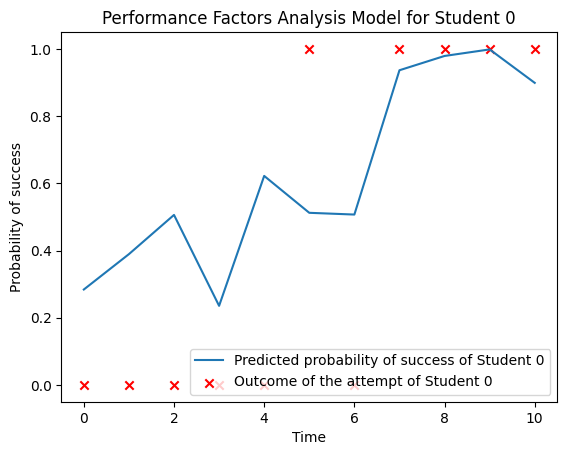

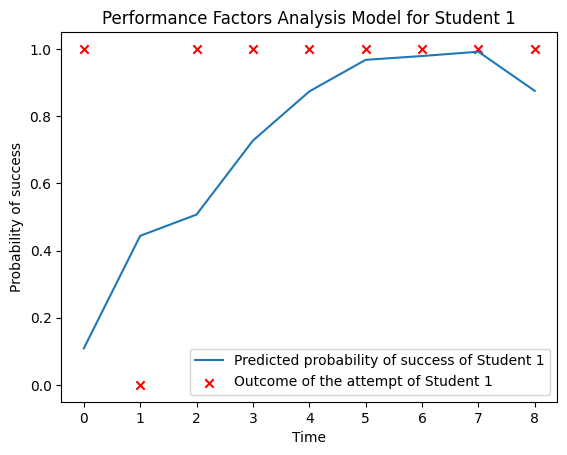

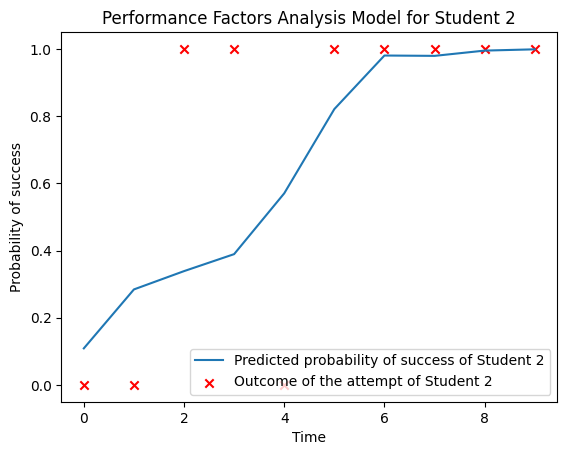

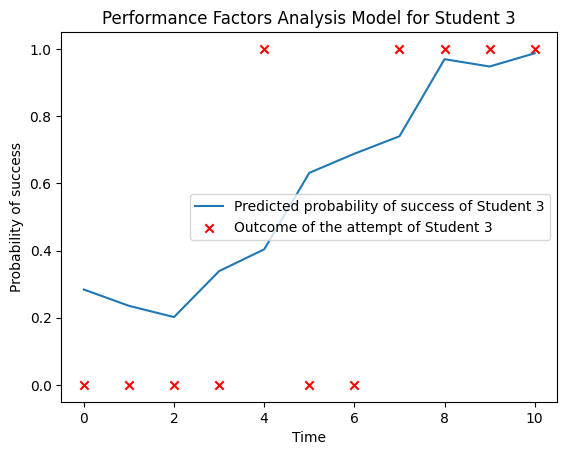

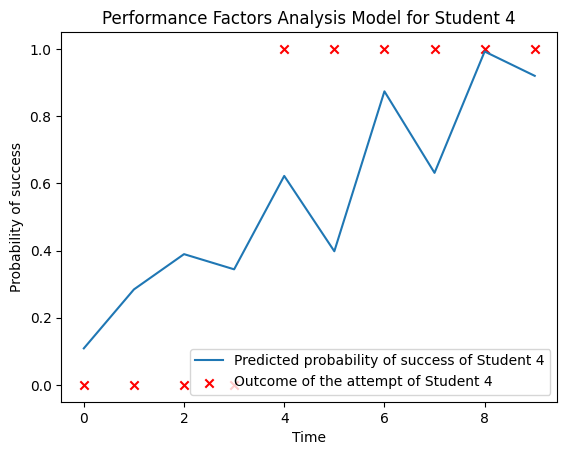

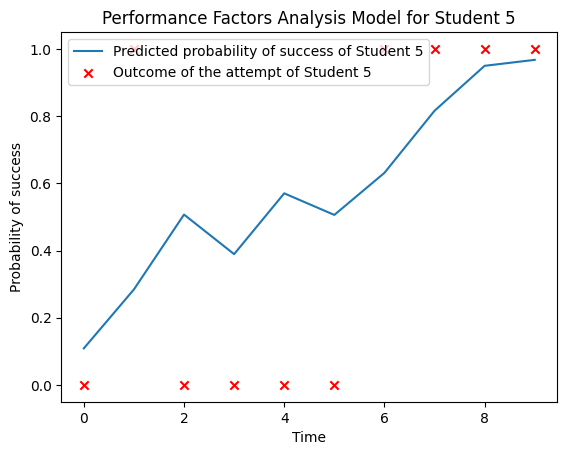

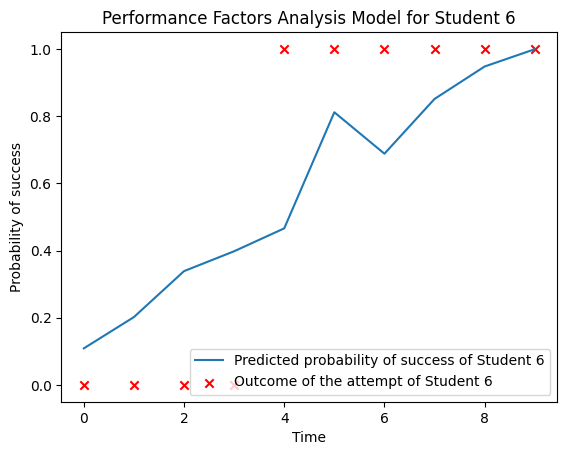

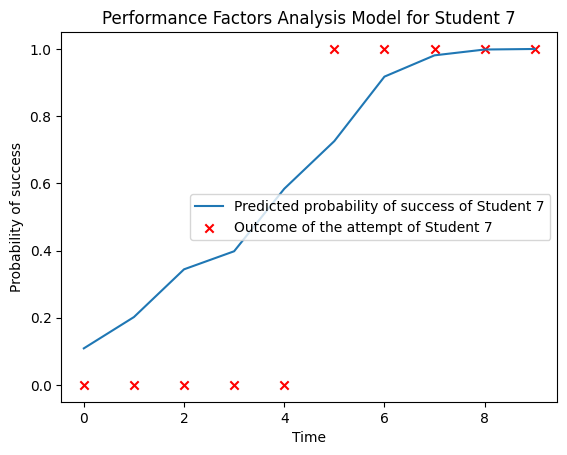

In [27]:
# Get the unique student IDs from the data
student_ids = np.unique(X.T[0]) # The transpose of X is used to access the first column

# Loop over the student IDs
for student_id in student_ids:
    # Filter the data and the feature matrix by the student ID
    # We need both the data matrix and the feature matrix because the data matrix contains the time steps and the outcomes, while the feature matrix contains the past successes and failures.
    X_student = X[X.T[0] == student_id] # The rows of X where the student ID matches
    Xlogreg_student = Xlogreg[X.T[0] == student_id] # The rows of Xlogreg where the student ID matches
    
    # Get the time steps and the outcomes for the student
    time_student = X_student.T[1] # The second column of X_student
    outcome_student = X_student.T[5] # The sixth column of X_student
    
    # Predict the probability of success for the student using the model
    prob_success_student = model.predict_proba(Xlogreg_student).T[1] # The probability of success for each row of Xlogreg_student

    
    # Plot the time steps and the probability of success for the student.
    # A line plot with time on the x axis and probability of success on the y axis.
    plt.plot(time_student, prob_success_student, label = "Predicted probability of success of Student %d" % student_id)
    # A scatter plot of the time steps and the outcomes of the attempts for the student, where a success is indicated by a red cross at y = 1 and a failure is indicated by a red cross at y = 0.
    plt.scatter(time_student, outcome_student, marker = "x", color = "red", label = "Outcome of the attempt of Student %d" % student_id)
    
    # A scatter plot with time on the x axis and outcome on the y axis
    plt.xlabel("Time") # The label for the x axis
    plt.ylabel("Probability of success") # The label for the y axis
    plt.title("Performance Factors Analysis Model for Student %d" % student_id) # The title for the plot
    plt.legend() # The legend for the plot
    plt.show() # Show the plot

### Task 04.07

In the previous task, you probably noticed that the predicted success probability of the performance factors analysis model sometimes drops for later timesteps. Explain this finding.

**ANSWER:** 
It's just a prediction. The student might had a good run it predicts top performance but if the student has a failiour in a later attempt the model needs to correct itself reducing the prediction.

This may suggest that the 10th attempt is more difficult or more different than the 9th attempt, and that the student’s past successes and failures are not enough to predict the outcome. The actual outcome of the 10th attempt is a failure, which confirms that the model overestimates the probability of success.

The predicted success probability of the performance factors analysis model sometimes drops for later timesteps. This means that the model predicts that the student is less likely to succeed on a later attempt than on an earlier attempt, even though the student has more practice on the knowledge component (KC). This finding may indicate that the model is not fitting the data well, and that there are some other factors that influence the probability of success that the model does not account for

### Task 04.08 (Bonus Task)

Extend the performance factors analysis model with exercise difficulty parameters and fit it to the data. Print the accuracy and the parameters. How did this change influence the accuracy compared to the model in Task 04.04?

In [32]:
# Import the numpy library for working with arrays
import numpy as np

# Import the logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

# Extract the columns of interest from the data matrix X
student = X[:, 0]  # The student ID
time = X[:, 1] # The time step of the attempt
exercise = X[:, 2] # The exercise ID
skill1 = X[:, 3] # Whether the exercise requires the first skill (1) or not (0)
skill2 = X[:, 4] # Whether the exercise requires the second skill (1) or not (0)
outcome = X[:, 5] # Whether the attempt was successful (1) or not (0)

# Initialize the extended feature matrix with zeros
Xlogreg_ext = np.zeros((len(X), 8)) # The shape of the matrix is the same as the number of rows in X and 8 columns

# Loop over the rows of the data. Each row corresponds to one attempt of one student on an exercise. len(X) is the number of rows in X.
for i in range(len(X)):
    # If the exercise requires the first skill
    if skill1[i] == 1:
        # Count the past successes and failures of the student on the first skill
        si1t = outcome[(student == student[i]) & (time < time[i]) & (skill1 == 1)].sum()
        fi1t = len(outcome[(student == student[i]) & (time < time[i]) & (skill1 == 1)]) - si1t
        # Assign the values to the feature matrix
        Xlogreg_ext[i, 0] = si1t
        Xlogreg_ext[i, 1] = fi1t
        Xlogreg_ext[i, 2] = 1
        # Assign the difficulty of the exercise for the first skill
        Xlogreg_ext[i, 6] = exercise[i]
    # If the exercise requires the second skill
    if skill2[i] == 1:
        # Count the past successes and failures of the student on the second skill
        s2 = outcome[(student == student[i]) & (time < time[i]) & (skill2 == 1)].sum()
        f2 = len(outcome[(student == student[i]) & (time < time[i]) & (skill2 == 1)]) - s2
        # Assign the values to the feature matrix
        Xlogreg_ext[i, 3] = s2
        Xlogreg_ext[i, 4] = f2
        Xlogreg_ext[i, 5] = 1
        # Assign the difficulty of the exercise for the second skill
        Xlogreg_ext[i, 7] = exercise[i]

# Create an instance of the logistic regression model with the specified parameters
model_ext = LogisticRegression(penalty = 'l2', fit_intercept = False, C = 1.0)

# Fit the model to the extended feature matrix and the target vector
model_ext.fit(Xlogreg_ext, outcome)

# Print the accuracy of the model on the training data
print(model_ext.score(Xlogreg_ext, outcome))

# Print the trained parameters of the model in the following format
print("gamma_1 = %g" % model_ext.coef_[0][0]) 
print("rho_1   = %g" % model_ext.coef_[0][1]) 
print("beta_1  = %g" % model_ext.coef_[0][2])
print("delta_1 = %g" % model_ext.coef_[0][6])
print("gamma_2 = %g" % model_ext.coef_[0][3]) 
print("rho_2   = %g" % model_ext.coef_[0][4])
print("beta_2  = %g" % model_ext.coef_[0][5]) 
print("delta_2 = %g" % model_ext.coef_[0][7])

# Compare the accuracy of the extended model with the original model
accuracy_diff = model_ext.score(Xlogreg_ext, outcome) - model.score(Xlogreg, outcome)
print("The accuracy of the extended model is %g" % accuracy_diff)
if accuracy_diff > 0:
    print("This means that the extended model is better than the original model by %g percentage points." % (accuracy_diff * 100))
elif accuracy_diff < 0:
    print("This means that the extended model is worse than the original model by %g percentage points." % (-accuracy_diff * 100))
else:
    print("This means that the extended model is the same as the original model.")



0.8148148148148148
gamma_1 = 1.40111
rho_1   = 0.445014
beta_1  = -0.9021
delta_1 = 0.227954
gamma_2 = 1.00944
rho_2   = 0.395667
beta_2  = -0.365937
delta_2 = -0.485557
The accuracy of the extended model is 0.0246914
This means that the extended model is better than the original model by 2.46914 percentage points.


## Bayesian Knowledge Tracing

A Bayesian Knowledge Tracing Model is a two-state Hidden Markov Model (either a student mastered a skill at time $t$ or they did not), where we denote the random variable for the state of student $i$ at time $t$ as $Z_{i, t}$ and the random variable for the result (pass/fail) of student $i$ at time $t$ as $X_{i, t}$. The parameters of the model are:

\begin{align*}
p_{Z_{i, 1}}(1) &= p_\mathrm{start},\\
p_{X_{i, t}|Z_{i, t}}(0|1) &= p_\mathrm{slip}, \\
p_{X_{i, t}|Z_{i, t}}(1|0) &= p_\mathrm{guess}, \\
p_{Z_{i, t}|Z_{i, t-1}}(1|1) &= 1, &\text{ and} \\
p_{Z_{i, t}|Z_{i, t-1}}(1|0) &= p_\mathrm{trans}
\end{align*}

Given a series of past results $x_{i, 1}, \ldots, x_{i, t}$ for student $i$, we denote:

\begin{align}
p_{i, t+1} &= p_{Z_{i, t+1}|X_{i, t}, \ldots, X_{i, 1}}(1|x_{i, t}, \ldots, x_{i, 1}) & \text{ and} \\
q_{i, t}   &= p_{Z_{i, t}|X_{i, t}, \ldots, X_{i, 1}}(1|x_{i, t}, \ldots, x_{i, 1})
\end{align}

With these two short-hand notations, we obtain the following equations (refer to the lecture slides for the derivation):
\begin{align}
p_{i, t+1} &= q_{i, t} + p_\mathrm{trans} \cdot (1 - q_{i, t}) \\
q_{i, t}   &=
\begin{cases}
\frac{(1-p_\mathrm{slip}) \cdot p_{i, t}}{(1-p_\mathrm{slip}) \cdot p_{i, t} + p_\mathrm{guess} \cdot (1 - p_{i, t})} & \text{if } x_{i, t} = 1 \\
\frac{p_\mathrm{slip} \cdot p_{i, t}}{p_\mathrm{slip} \cdot p_{i, t} + (1-p_\mathrm{guess}) \cdot (1 - p_{i, t})} & \text{if } x_{i, t} = 0
\end{cases}
\end{align}

### Task 04.09

Let's assume we have a series of results $x_{i, 1}, \ldots, x_{i, t}$ for student $i$ with the last entry being $x_{i, t} = 1$.

Further, let's denote the joint probability $p_{Z_{i, t}, X_{i, t}, \ldots, X_{i, 1}}(z, x_{i, t}, \ldots, x_{i, 1})$ as $\alpha_{i, t}(z)$.

Show, that the following equality holds:
\begin{equation*}
\alpha_{i, t}(1) = (1 - p_\mathrm{slip}) \cdot \Big[p_\mathrm{trans} \cdot \alpha_{i, t-1}(0) + \alpha_{i, t-1}(1)\Big]
\end{equation*}

**HINT**: Recall that, in a BKT model, the latent space $Z_{i, t}$ of student $i$ at time $t$ is conditionally independent of all past observations given $Z_{i, t-1}$ and $X_{i, t}$ is conditionally independent from past observations given $Z_{i, t}$.

Other than these bits of information, you 'only' need to smartly apply the definition of conditional probabilities and the law of total probability for this task. 

**ANSWER:**

### Task 04.10

Given the equations above, write a Python function that takes an array $x_{i, 1}, \ldots, x_{i, t}$ of student results (pass/fail) for one skill and the parameters $p_\mathrm{start}$, $p_\mathrm{slip}$, $p_\mathrm{guess}$, and $p_\mathrm{trans}$ as input and returns an array of probability $p_{i, 1+1}, \ldots, p_{i, t+1}$ as output.

### Task 04.11

For this task, use the parameter settings $p_\mathrm{start} = 0.1$, $p_\mathrm{slip} = 0.1$, $p_\mathrm{guess} = 0.2$, and $p_\mathrm{trans} = 0.3$.

For each student and each skill, provide a plot with time step $t$ on the x axis and $p_{i, t+1}$ on the y axis, using your function from Task 04.10.

### Task 04.12

For each of the parameters, test what happens if you increase the parameter by 0.1. Report the effect on $p_{i, t+1}$.

**ANSWER FOR $p_\mathrm{start}$:** 

**ANSWER FOR $p_\mathrm{slip}$:** 

**ANSWER FOR $p_\mathrm{guess}$:** 

**ANSWER FOR $p_\mathrm{trans}$:** 

## Deep Knowledge Tracing

### Task 04.13

Generate a list `Xs_dkt` of matrices, one per student.

The matrix `Xi` for student $i$ should start with one row of zeros and each subsequent row `Xi[t+1, :]` of the matrix should correspond to one attempt of student $i$ at some exercise at time $t$. There should be two columns per exercise (twelve columns overall), where entry `Xi[t+1, j]` should be 1 if the attempt $t$ was successful and `Xi[t+1, 6 + j]` should be 1 if the attempt was a failure. The last attempt of the student should not be represented in `Xi`.

For example, if student $i$ has three attempts, one success on exercise 0, one failure on exercise 2, and a success on exercise 2, then the matrix `Xi` should be as follows:

```
Xi = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # zero row for the first attempt
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # first attempt (success at first exercise)
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]  # second attempt (failure at third exercise)
]
```

Generate a list `Ys_dkt` of matrices, one per student, which contain the exercise indices and the results results of the student.

For example, if student $i$ has three attempts, one success on exercise 0, one failure on exercise 2, and a success on exercise 2, then `Yi` should be as follows:

```
Yi = [
    [0, 1],
    [2, 0],
    [2, 1]
]
```

In [36]:
import torch
num_exercises = 6

# Import the torch library
import torch

# Initialize the lists Xs_dkt and Ys_dkt as empty lists
Xs_dkt = []
Ys_dkt = []

# Get the unique student IDs from the data
student_ids = np.unique(X.T[0]) # The transpose of X is used to access the first column

# Loop over the student IDs
for student_id in student_ids:
    # Filter the data by the student ID
    X_student = X[X.T[0] == student_id] # The rows of X where the student ID matches
    
    # Get the exercise IDs, the skill IDs, and the outcomes for the student
    exercise_student = X_student.T[2] # The third column of X_student
    skill1_student = X_student.T[3] # The fourth column of X_student
    skill2_student = X_student.T[4] # The fifth column of X_student
    outcome_student = X_student.T[5] # The sixth column of X_student
    
    # Initialize the matrix Xi for the student as a zero matrix with one row and 12 columns
    Xi = np.zeros((1, 12))
    
    # Initialize the matrix Yi for the student as an empty matrix
    Yi = np.empty((0, 2))
    
    # Loop over the attempts of the student, excluding the last one
    for i in range(len(X_student) - 1):
        # Get the exercise ID, the skill IDs, and the outcome for the current attempt
        exercise = exercise_student[i]
        skill1 = skill1_student[i]
        skill2 = skill2_student[i]
        outcome = outcome_student[i]
        
        # Create a new row for the matrix Xi based on the attempt
        new_row = np.zeros(12) # A zero vector with 12 elements
        if outcome == 1: # If the attempt was successful
            new_row[exercise] = 1 # Set the element at the exercise index to 1
        else: # If the attempt was a failure
            new_row[6 + exercise] = 1 # Set the element at the exercise index plus 6 to 1
        
        # Append the new row to the matrix Xi
        Xi = np.append(Xi, [new_row], axis=0) # Axis=0 means appending along the rows
        
        # Create a new row for the matrix Yi based on the attempt
        new_row = np.array([exercise, outcome]) # A vector with the exercise ID and the outcome
        
        # Append the new row to the matrix Yi
        Yi = np.append(Yi, [new_row], axis=0)
    
    # Convert the matrices Xi and Yi to torch tensors
    Xi = torch.from_numpy(Xi).float() # Convert to float tensor
    Yi = torch.from_numpy(Yi).long() # Convert to long tensor
    
    # Append the tensors Xi and Yi to the lists Xs_dkt and Ys_dkt
    Xs_dkt.append(Xi)
    Ys_dkt.append(Yi)
    
print(Xs_dkt)
print(Ys_dkt)


[tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]]), tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

### Task 04.14

The following deep knowledge tracing model takes a student matrix `Xi` from Task 04.13 as input and produces a matrix `Logits` with as many rows and 6 columns, one per exercise. The entry `Logits[t, j]` is supposed to be the logit probability of student $i$ succeeding at exercise $j$ in time step $t$.

To train this model, we want to use the following scheme:

Repeat for num_epochs:
1. Pick a random student $i$.
2. Get the matrix `Xi` and the array `Yi` from Task 04.11.
3. Compute the output `Logits` for input `Xi` via the `forward` method of the DKT modul.
4. For each time step $t$, repeat:
    1. Retrieve the exercise index `j = Yi[t, 0]` and the actual result `x = Yi[t, 1]`.
    2. Use the function `torch.nn.functional.binary_crossentropy_with_logits` to compute the loss between the predicted logit probability `Logits[t, j]` and the actual outcome `x`.

Implement this scheme in the `fit` function of the model below.

In [35]:
import torch
import random

class DKT(torch.nn.Module):
    """The initialization function of a pytorch module. Here, we should set all hyperparameters
    of the model, such as the regularization strength.

    Parameters
    ----------
    num_exercises: int
        The number of exercises in the data set.
    num_neurons: int (default = 32)
        The number of neurons used in the GRU.
    C: float (default = 1000)
        The inverse of the L2 regularization strength.
    num_epochs: int (default = 1000)
        How many times we iterate over the data set.
    learning_rate: float (default = 1E-2)

    """
    def __init__(self, num_exercises, num_neurons = 32, C = 1000., num_epochs = 1000, learning_rate = 1E-2):
        super(DKT, self).__init__()
        self.num_exercises_ = num_exercises
        self.num_neurons_   = num_neurons
        self.C_             = C
        self.num_epochs_    = num_epochs
        self.learning_rate_ = learning_rate
        # initialize the network layers
        self.gru_           = torch.nn.GRU(self.num_exercises_*2, self.num_neurons_)
        self.out_           = torch.nn.Linear(self.num_neurons_, self.num_exercises_)


    """Predicts logit probabilities of success for the given input data
    
    Parameters
    ----------
    X: torch.tensor
        A feature matrix for one student, where each row represents one attempted exercise.
        The first self.num_exercises_ columns should indicate whether a student achieved
        a success at exercise j in this timestep, the latter self.num_exercises_ columns
        should indicate failures.

    Returns
    -------
    Logits: torch.tensor
        A matrix where the entry Logits[t, j] indicates the predicted logit success probability
        for the student for exercise j at time t.

    """
    def forward(self, X):
        H, _ = self.gru_(X)
        return self.out_(H)

    """Scores the accuracy of this model.
    
    Parameters
    ----------
    X: list
        A list of feature matrices, one per student.
    Y: list
        A list of target matrices, one per student.

    Returns
    -------
    acc: float
        An accuracy value.
    
    """
    def score(self, X, Y):
        num_attempts  = 0
        num_successes = 0
        for i in range(len(X)):
            Logits = self.forward(X[i])
            for t in range(Y[i].shape[0]):
                num_attempts += 1
                j = int(Y[i][t, 0])
                if Y[i][t, 1] > 0.5 and Logits[t, j] > 0:
                    num_successes += 1
                elif Y[i][t, 1] < 0.5 and Logits[t, j] <= 0:
                    num_successes += 1
        return num_successes / num_attempts

    """Fits this model to the given data matrix.

    Parameters
    ----------
    X: list
        A list of feature matrices, one per student.
    Y: list
        A list of target matrices, one per student.

    """
    def fit(self, X, Y):
        raise ValueError('This needs to be implemented!')

### Task 04.15

Train the model on the data using your `fit` function from Task 04.14 and report the accuracy using the `score` function.